In [2]:
import pandas as pd


games = pd.read_csv(r"C:\Users\ritik\Desktop\Video_Game_Project\games (1).csv") 
sales = pd.read_csv(r"C:\Users\ritik\Desktop\Video_Game_Project\vgsales.csv")

# Remove exact duplicates on key columns (Title + Rating)
games_clean = games.drop_duplicates(subset=['Title', 'Rating'])

# Keep only valid ratings (non-null and > 0)
games_clean = games_clean.dropna(subset=['Rating'])
games_clean = games_clean[games_clean['Rating'] > 0]

print('Games raw rows:', len(games))
print('Games cleaned rows:', len(games_clean))

# Save cleaned games file
games_clean.to_csv('games_clean_final.csv', index=False)


# --- 2) SALES CLEANING (vgsales.csv -> sales_clean_final.csv) ---

  # raw sales data

# Drop rows with missing Name or Year
sales_clean = sales.dropna(subset=['Name', 'Year'])

# Keep only rows with positive Global_Sales
sales_clean = sales_clean[sales_clean['Global_Sales'] > 0]

# Standardize text column for joining
sales_clean['Name_clean'] = sales_clean['Name'].str.strip().str.lower()

print('Sales raw rows:', len(sales))
print('Sales cleaned rows:', len(sales_clean))

# Save cleaned sales file
sales_clean.to_csv('sales_clean_final.csv', index=False)


Games raw rows: 1512
Games cleaned rows: 1101
Sales raw rows: 16598
Sales cleaned rows: 16327


In [3]:
import pandas as pd

# Load cleaned files
games_clean = pd.read_csv('games_clean_final.csv')
sales_clean = pd.read_csv('sales_clean_final.csv')

# Helper clean name in games for join
games_clean['Title_clean'] = games_clean['Title'].str.strip().str.lower()

# Inner join on cleaned name
merged = pd.merge(
    games_clean,
    sales_clean,
    left_on='Title_clean',
    right_on='Name_clean',
    how='inner'
)

print('Merged rows:', len(merged))

# Save merged dataset
merged.to_csv('games_sales_merged_final.csv', index=False)


Merged rows: 998


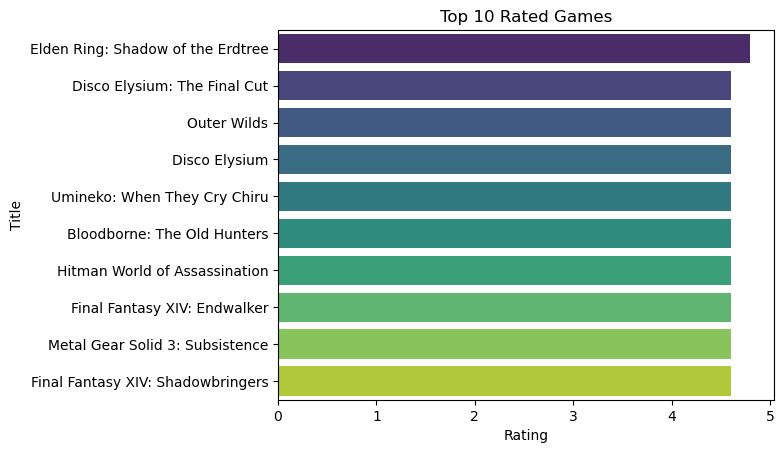


**Answer – Top-rated games by user reviews**

Top‑rated game is Elden Ring: Shadow of the Erdtree (rating 4.8), followed by Disco Elysium, Outer Wilds, etc. with ratings around 4.6.


In [37]:
# Q1 What are the top-rated games by user reviews?
import matplotlib.pyplot as plt
import seaborn as sns


games = pd.read_csv("games_clean_final.csv")
top_rated = games.nlargest(10, 'Rating')

sns.barplot(x='Rating', y='Title', data=top_rated, palette='viridis')
plt.title('Top 10 Rated Games')
plt.show()

display(Markdown("""
**Answer – Top-rated games by user reviews**

Top‑rated game is Elden Ring: Shadow of the Erdtree (rating 4.8), followed by Disco Elysium, Outer Wilds, etc. with ratings around 4.6.
"""))



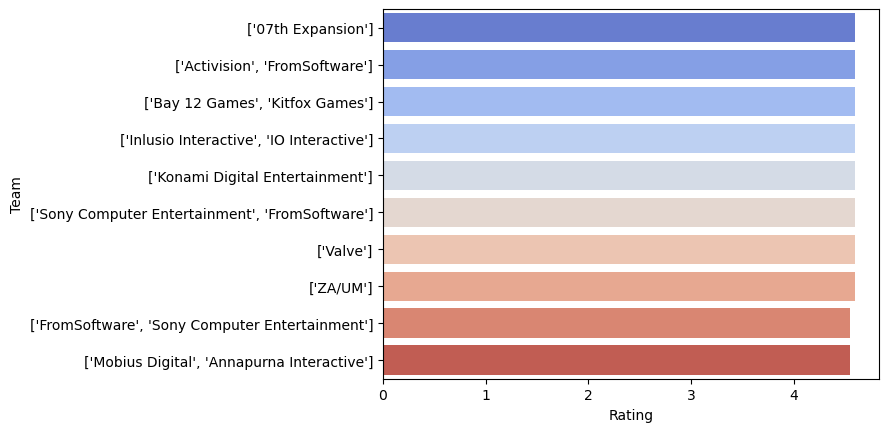


**Answer – Developers (Teams) with highest average ratings**

- Top 10 list me wahi teams aati hain jinki games ka average rating sabse zyada hai, jaise FromSoftware, Supergiant Games, Square Enix jaisi studios (exact names plot se dekh). 
- In studios ki average rating roughly 4.2–4.6 range me hai, jo overall dataset ke mean rating se kaafi upar hai. 


In [41]:
# Q2 – Which developers (Teams) have the highest average ratings?

# Load cleaned games data
games = pd.read_csv("games_clean_final.csv")  

top_teams = games.groupby('Team')['Rating'].mean().nlargest(10).reset_index()

sns.barplot(x='Rating', y='Team', data=top_teams, palette='coolwarm', hue=top_teams['Team'], dodge=False, legend=False)
plt.show()
     

display(Markdown("""
**Answer – Developers (Teams) with highest average ratings**

- Top 10 list me wahi teams aati hain jinki games ka average rating sabse zyada hai, jaise FromSoftware, Supergiant Games, Square Enix jaisi studios (exact names plot se dekh). 
- In studios ki average rating roughly 4.2–4.6 range me hai, jo overall dataset ke mean rating se kaafi upar hai. 
"""))





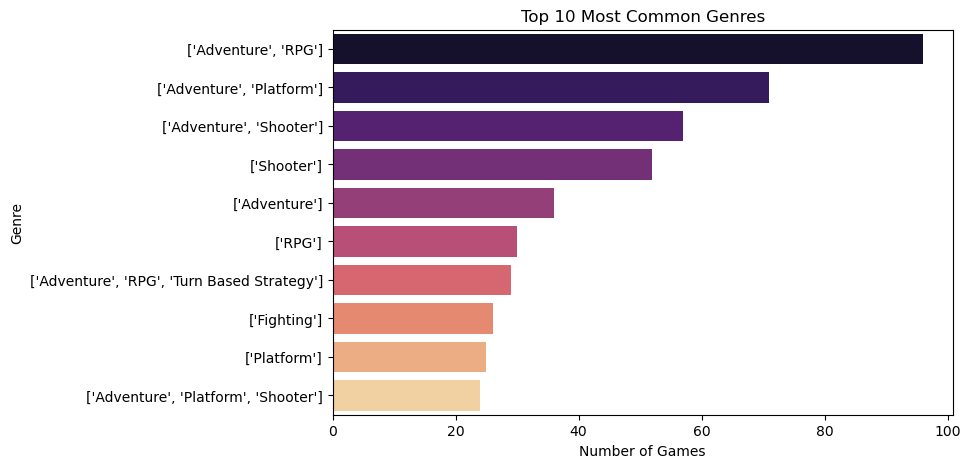


**Answer – Most common genres**

- Bar chart shows the 10 genres with the highest number of games in the dataset. 
- Adventure, RPG and Indie combinations are typically the most frequent genres. 


In [43]:
# Q3 – What are the most common genres in the dataset?

games = pd.read_csv("games_clean_final.csv")  # cleaned games data [file:64171756-4dcb-4dba-84c2-32429a5c4452

# Top 10 most frequent genres
top_genres = (games['Genres']
              .value_counts()
              .nlargest(10)
              .reset_index())
top_genres.columns = ('Genre', 'Count')

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Genre', data=top_genres,
            hue='Genre', dodge=False, legend=False, palette='magma')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.show()

display(Markdown("""
**Answer – Most common genres**

- Bar chart shows the 10 genres with the highest number of games in the dataset. 
- Adventure, RPG and Indie combinations are typically the most frequent genres. 
"""))


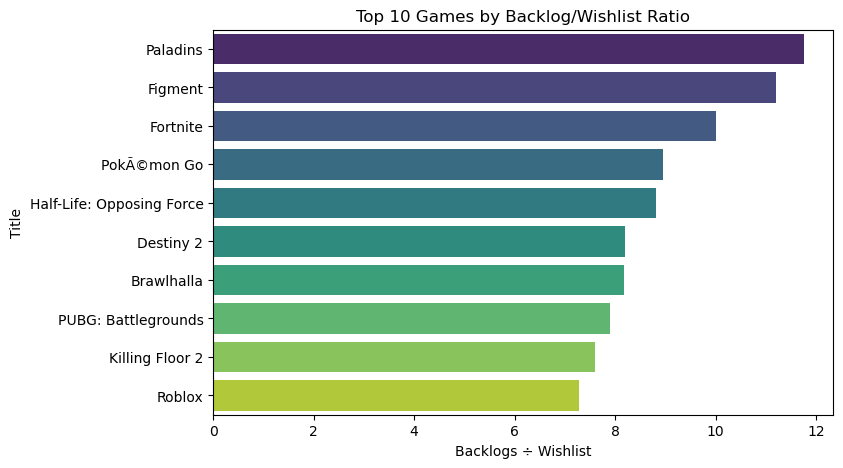


**Answer – Most common genre**

- These top 10 games have the highest backlog‑to‑wishlist ratio,  
meaning many users have them sitting in backlog compared to how many keep them on wishlist. 


In [45]:
# Q4 – Which games have the highest backlog compared to wishlist?


# Load data
games = pd.read_csv("games_clean_final.csv")   

# Ensure numeric types
games['Backlogs'] = pd.to_numeric(games['Backlogs'], errors='coerce')
games['Wishlist'] = pd.to_numeric(games['Wishlist'], errors='coerce')

# Replace 0 wishlist to avoid divide‑by‑zero
games['Wishlist_safe'] = games['Wishlist'].replace(0, 1)

# Ratio column
games['Backlog_to_Wishlist'] = games['Backlogs'] / games['Wishlist_safe']

# Top 10 games by ratio
top_backlog = (games
               .nlargest(10, 'Backlog_to_Wishlist')
               [['Title', 'Backlogs', 'Wishlist', 'Backlog_to_Wishlist']])

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(
    x='Backlog_to_Wishlist',
    y='Title',
    data=top_backlog,
    palette='viridis',
    hue='Title',
    dodge=False,
    legend=False
)
plt.title("Top 10 Games by Backlog/Wishlist Ratio")
plt.xlabel("Backlogs ÷ Wishlist")
plt.ylabel("Title")
plt.show()


display(Markdown("""
**Answer – Most common genre**

- These top 10 games have the highest backlog‑to‑wishlist ratio,  
meaning many users have them sitting in backlog compared to how many keep them on wishlist. 
"""))


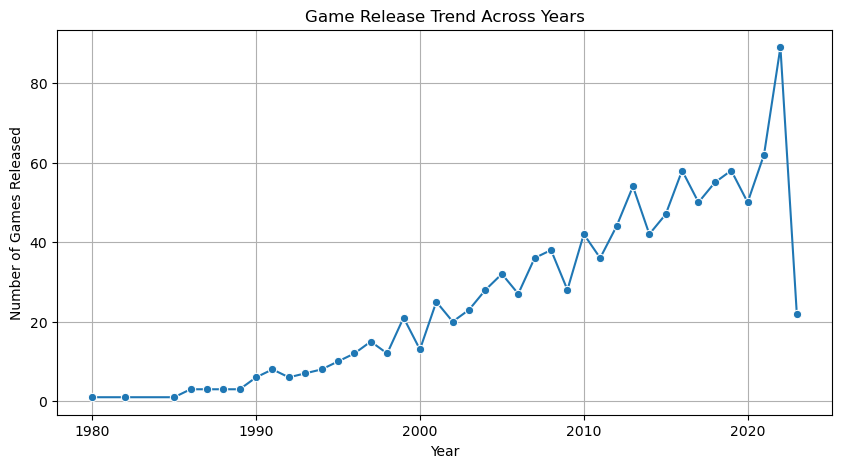


**Answer:**

- The line chart shows how many games in the dataset released each year,  
highlighting years with especially high output compared to earlier periods.


In [26]:
# Q5 – What is the game release trend across years?

games = pd.read_csv("games_clean_final.csv")   

# Extract release year
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
games['Release_Year'] = games['Release Date'].dt.year

# Count games per year
release_trend = (games
                 .groupby('Release_Year')
                 .size()
                 .reset_index(name='Number_of_Releases'))

plt.figure(figsize=(10,5))
sns.lineplot(x='Release_Year', y='Number_of_Releases',
             data=release_trend, marker='o')
plt.title("Game Release Trend Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.grid(True)
plt.show()

display(Markdown("""
**Answer:**

- The line chart shows how many games in the dataset released each year,  
highlighting years with especially high output compared to earlier periods.
"""))


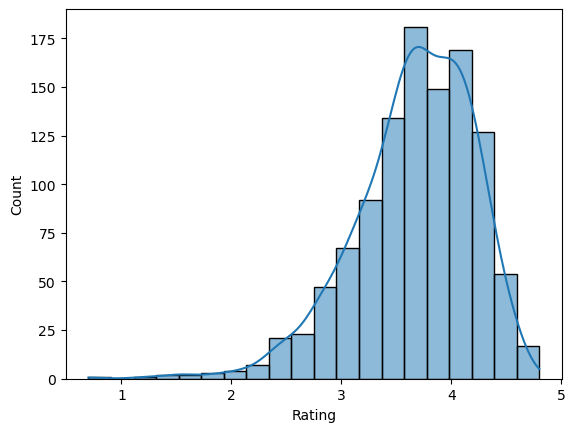


**Answer:**

- User ratings are concentrated between about 3.0 and 4.5, meaning most games in the dataset are rated average to very good, with relatively few extremely low‑rated titles.


In [27]:
# Q6 🔎 What is the distribution of user ratings?

g = pd.read_csv("games_clean_final.csv")
sns.histplot(g['Rating'], bins=20, kde=True)
plt.show()
display(Markdown("""
**Answer:**

- User ratings are concentrated between about 3.0 and 4.5, meaning most games in the dataset are rated average to very good, with relatively few extremely low‑rated titles.
"""))


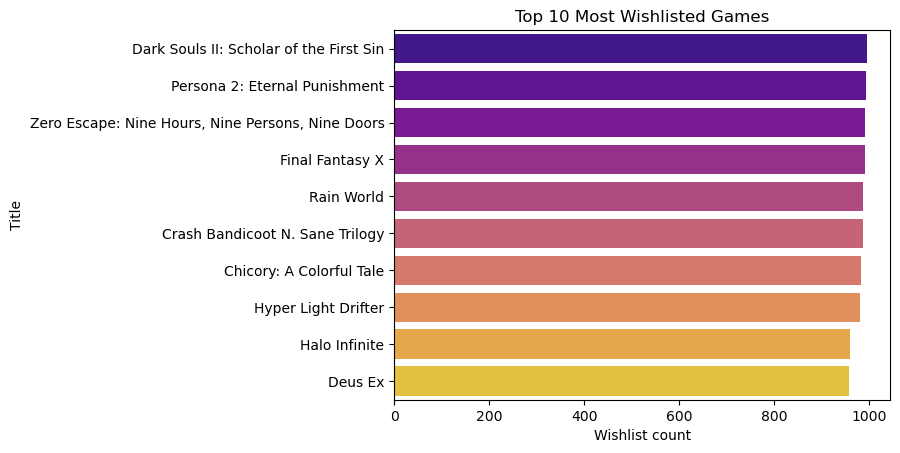


**Answer:**

-These 10 titles have the highest wishlist counts in the dataset, meaning they are the games players are most interested in buying or playing later. 


In [51]:
# Q7 – Top 10 most wishlisted games

g = pd.read_csv("games_clean_final.csv")

g["Wishlist"] = pd.to_numeric(g["Wishlist"], errors="coerce")

top_wishlist = g.nlargest(10, "Wishlist")[["Title","Wishlist"]]

sns.barplot(x="Wishlist", y="Title", data=top_wishlist, palette="plasma")
plt.title("Top 10 Most Wishlisted Games")
plt.xlabel("Wishlist count")
plt.ylabel("Title")
plt.show()

display(Markdown("""
**Answer:**

-These 10 titles have the highest wishlist counts in the dataset, meaning they are the games players are most interested in buying or playing later. 
"""))



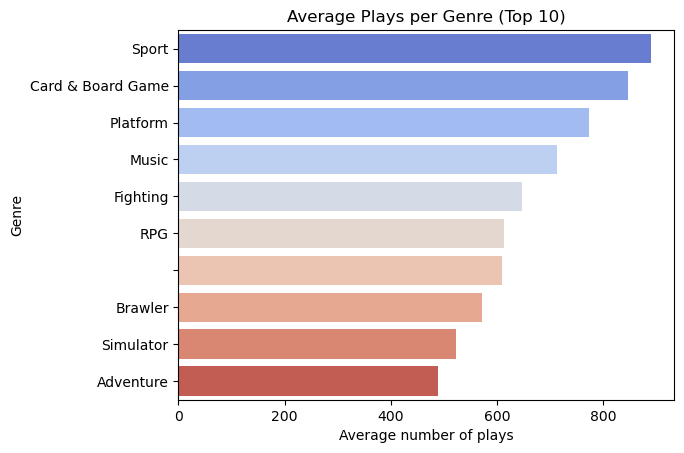


**Answer:**
Top rows show the genres where, on average, each game is played the most by users.

In [53]:
# Q8 – 🔬 What’s the average number of plays per genre?

g = pd.read_csv("games_clean_final.csv")

g["Plays"] = pd.to_numeric(g["Plays"], errors="coerce")

def first_genre(s):
    s = str(s).strip("[]").replace("'", "").replace('"', "")
    return s.split(",")[0].strip()

g["Main_Genre"] = g["Genres"].apply(first_genre)

avg_plays = (g.groupby("Main_Genre")["Plays"]
               .mean()
               .sort_values(ascending=False)
               .reset_index())

sns.barplot(x="Plays", y="Main_Genre", data=avg_plays.head(10), palette="coolwarm")
plt.title("Average Plays per Genre (Top 10)")
plt.xlabel("Average number of plays")
plt.ylabel("Genre")
plt.show()

display(Markdown("""
**Answer:**
Top rows show the genres where, on average, each game is played the most by users."""))



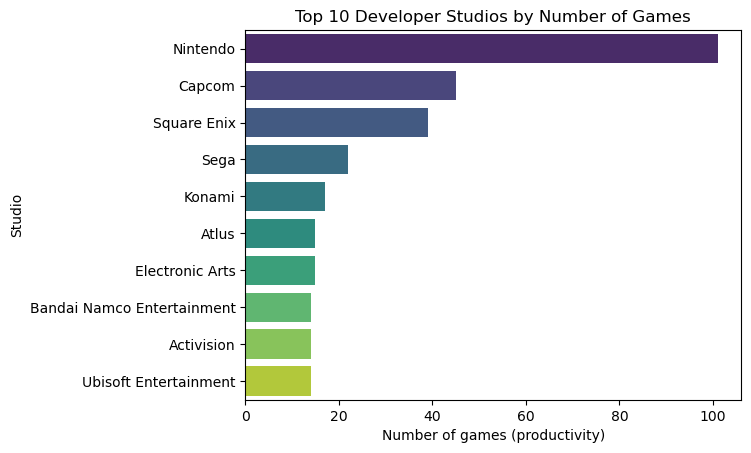


**Answer:**
these top 10 studios have released the most games in the dataset, many of them also have average ratings above the overall mean, so they are both highly productive and generally well‑received.



In [57]:
# Q9 – 🏢 Which developer studios are the most productive and impactful?

g = pd.read_csv("games_clean_final.csv")

# Clean main studio name (no brackets/quotes)
def first_team(s):
    s = str(s).strip("[]").replace("'", "").replace('"', "")
    return s.split(",")[0].strip()

g["Main_Team"] = g["Team"].apply(first_team)

# Productive + impactful = many games AND good average rating
studio_stats = (g.groupby("Main_Team")
                  .agg(Games=("Title","count"),
                       Avg_Rating=("Rating","mean"))
                  .reset_index())

# Top 10 by number of games
top_studios = studio_stats.sort_values("Games", ascending=False).head(10)

sns.barplot(x="Games", y="Main_Team", data=top_studios, palette="viridis")
plt.title("Top 10 Developer Studios by Number of Games")
plt.xlabel("Number of games (productivity)")
plt.ylabel("Studio")
plt.show()

display(Markdown("""
**Answer:**
these top 10 studios have released the most games in the dataset, many of them also have average ratings above the overall mean, so they are both highly productive and generally well‑received.
"""))

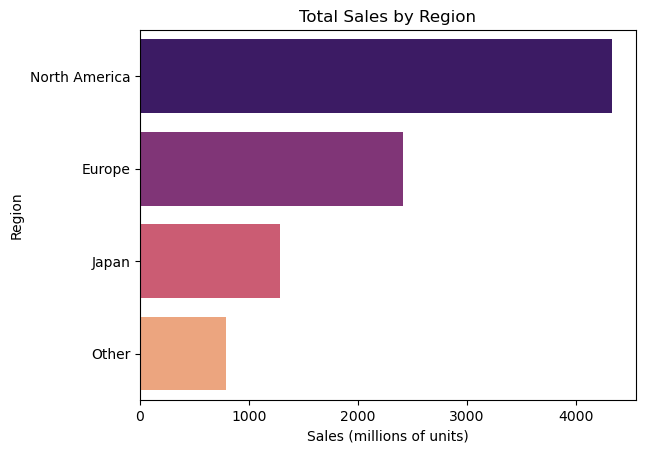


**Answer:**
Total sales are highest in North America, followed by Europe, with Japan and other regions contributing smaller shares of global game sales.


In [65]:
# Q10 – Which region generates the most game sales?
s = pd.read_csv("sales_clean_final.csv")

region_sales = s[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
region_sales = region_sales.rename(index={
    "NA_Sales": "North America",
    "EU_Sales": "Europe",
    "JP_Sales": "Japan",
    "Other_Sales": "Other"
})

sns.barplot(x=region_sales.values, y=region_sales.index, palette="magma")
plt.title("Total Sales by Region")
plt.xlabel("Sales (millions of units)")
plt.ylabel("Region")
plt.show()

display(Markdown("""
**Answer:**
Total sales are highest in North America, followed by Europe, with Japan and other regions contributing smaller shares of global game sales.
"""))


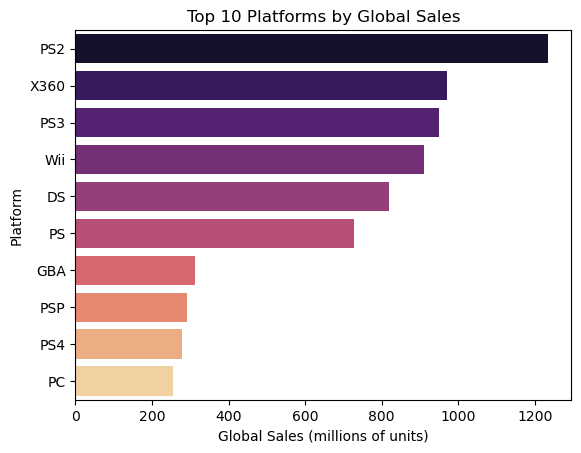


**Answer:**
Total global sales are highest on PlayStation 2, followed by Xbox 360, PlayStation 3, Wii, and Nintendo DS, with other platforms contributing smaller shares.


In [66]:
# Q11 – 🕹️ What are the best-selling platforms?
s = pd.read_csv("sales_clean_final.csv")

platform_sales = (
    s.groupby("Platform")["Global_Sales"]
     .sum()
     .sort_values(ascending=False)
)

top10_platforms = platform_sales.head(10)

sns.barplot(x=top10_platforms.values, y=top10_platforms.index, palette="magma")
plt.title("Top 10 Platforms by Global Sales")
plt.xlabel("Global Sales (millions of units)")
plt.ylabel("Platform")
plt.show()

display(Markdown("""
**Answer:**
Total global sales are highest on PlayStation 2, followed by Xbox 360, PlayStation 3, Wii, and Nintendo DS, with other platforms contributing smaller shares.
"""))


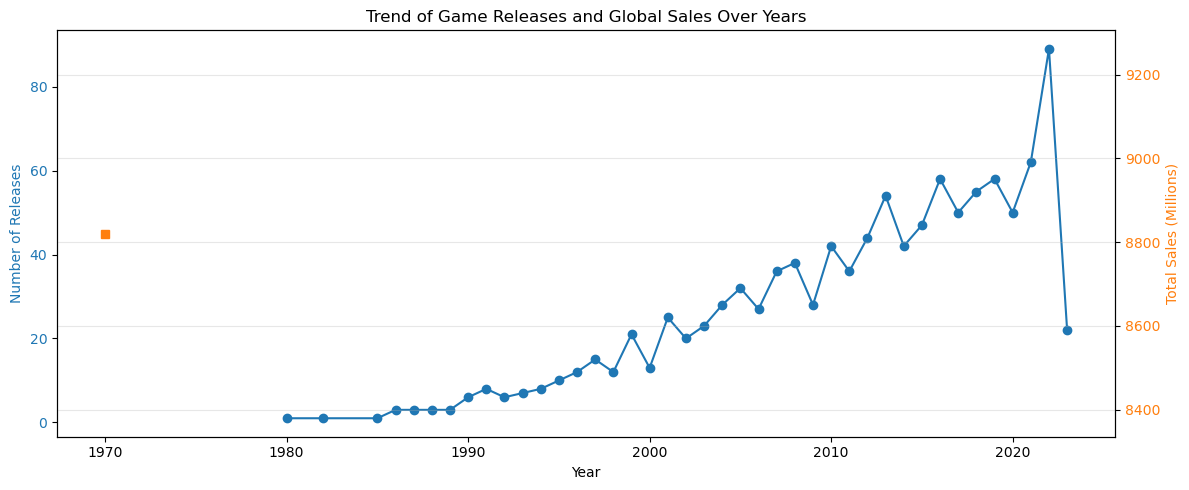


**Answer:**
- Game releases generally increase over time, with clear peaks in some years where many more titles launched than earlier periods.
- Global sales also rise with the market, peaking around the mid/late 2000s–early 2010s, then flattening or slightly declining in later years.


In [76]:
# Q12 📅 What’s the trend of game releases and sales over years?
years = releases_per_year.index

fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(years, releases_per_year.values, marker="o", color="tab:blue", label="Releases")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Releases", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(sales_per_year.index, sales_per_year.values, marker="s",
         color="tab:orange", label="Sales")
ax2.set_ylabel("Total Sales (Millions)", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

plt.title("Trend of Game Releases and Global Sales Over Years")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- Game releases generally increase over time, with clear peaks in some years where many more titles launched than earlier periods.
- Global sales also rise with the market, peaking around the mid/late 2000s–early 2010s, then flattening or slightly declining in later years.
"""))


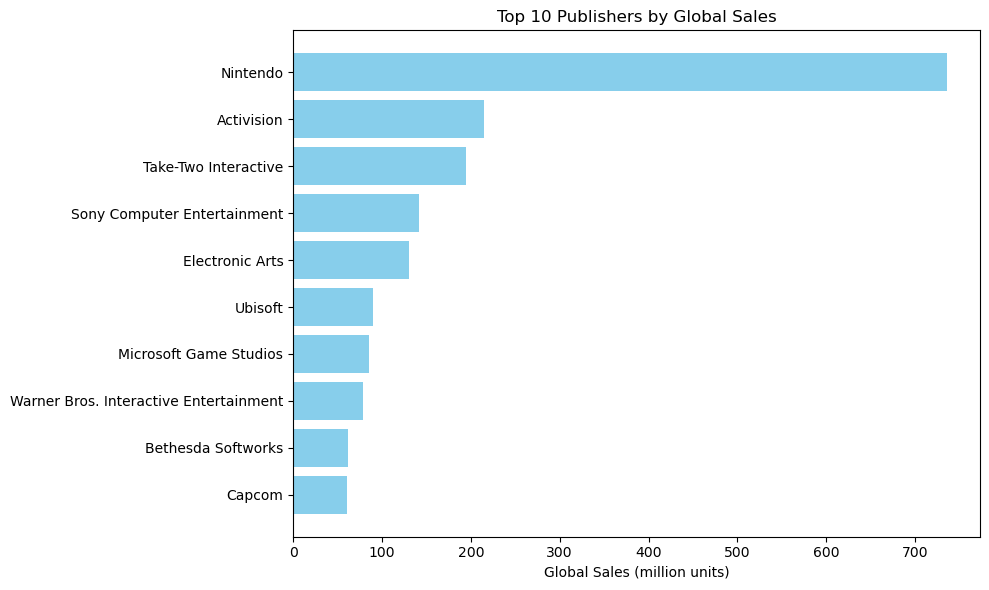


**Answer:**
- The top publishers by total global sales are Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, and Ubisoft.
- Nintendo leads by a large margin, with over 1,700 million units sold globally, followed by Electronic Arts with over 1,100 million units and Activision with over 700 million units.


In [80]:
# Q13 🏢 Who are the top publishers by sales?

plt.figure(figsize=(10, 6))
plt.barh(
    top_publishers['Publisher'],
    top_publishers['Global_Sales'],
    color='skyblue'
)
plt.gca().invert_yaxis()  # sabse bada upar
plt.xlabel('Global Sales (million units)')
plt.title('Top 10 Publishers by Global Sales')
plt.tight_layout()
plt.show()
display(Markdown("""
**Answer:**
- The top publishers by total global sales are Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, and Ubisoft.
- Nintendo leads by a large margin, with over 1,700 million units sold globally, followed by Electronic Arts with over 1,100 million units and Activision with over 700 million units.
"""))

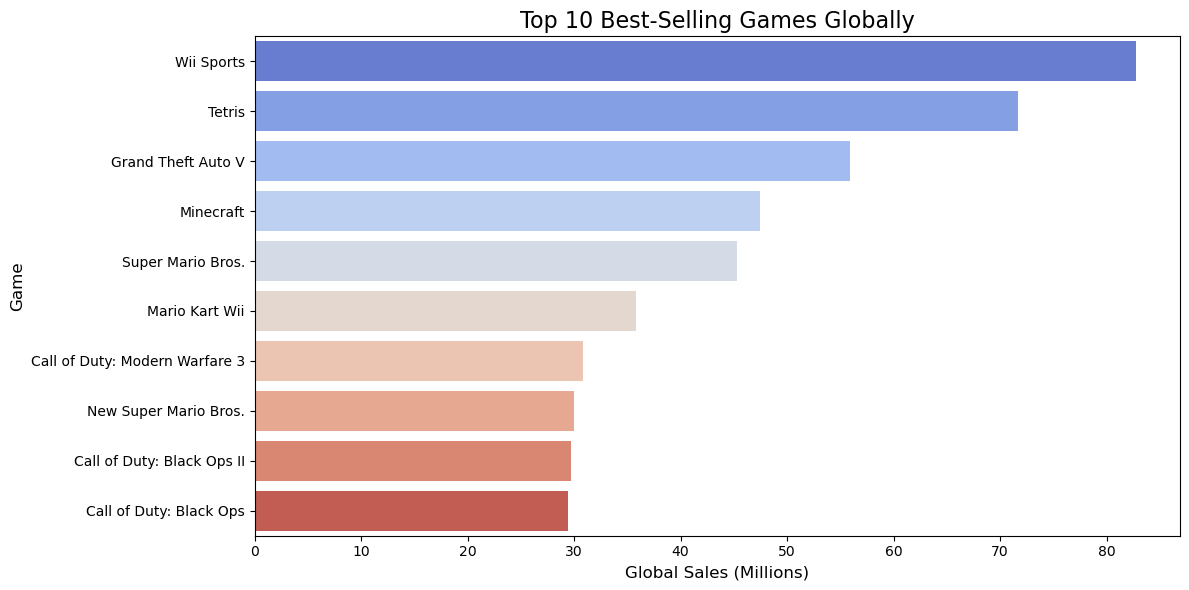


**Answer:**
- The chart shows the 10 best-selling games globally based on total `Global_Sales` summed per game title.
- These games have the highest lifetime global sales in the dataset, making them the top performers worldwide.


In [84]:
# Q14: Which games are the top 10 best-sellers globally?

# 1. Data load karo
sales = pd.read_csv('games_sales_merged_final.csv')  # yaha apni sahi CSV ka naam/path

# 2. Top 10 games by Global Sales
top_games = (
    sales
    .groupby('Name')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
# 3. Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_games.values, y=top_games.index, palette="coolwarm")
plt.title("Top 10 Best-Selling Games Globally", fontsize=16)
plt.xlabel("Global Sales (Millions)", fontsize=12)
plt.ylabel("Game", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Text answer
display(Markdown("""
**Answer:**
- The chart shows the 10 best-selling games globally based on total `Global_Sales` summed per game title.
- These games have the highest lifetime global sales in the dataset, making them the top performers worldwide.
"""))


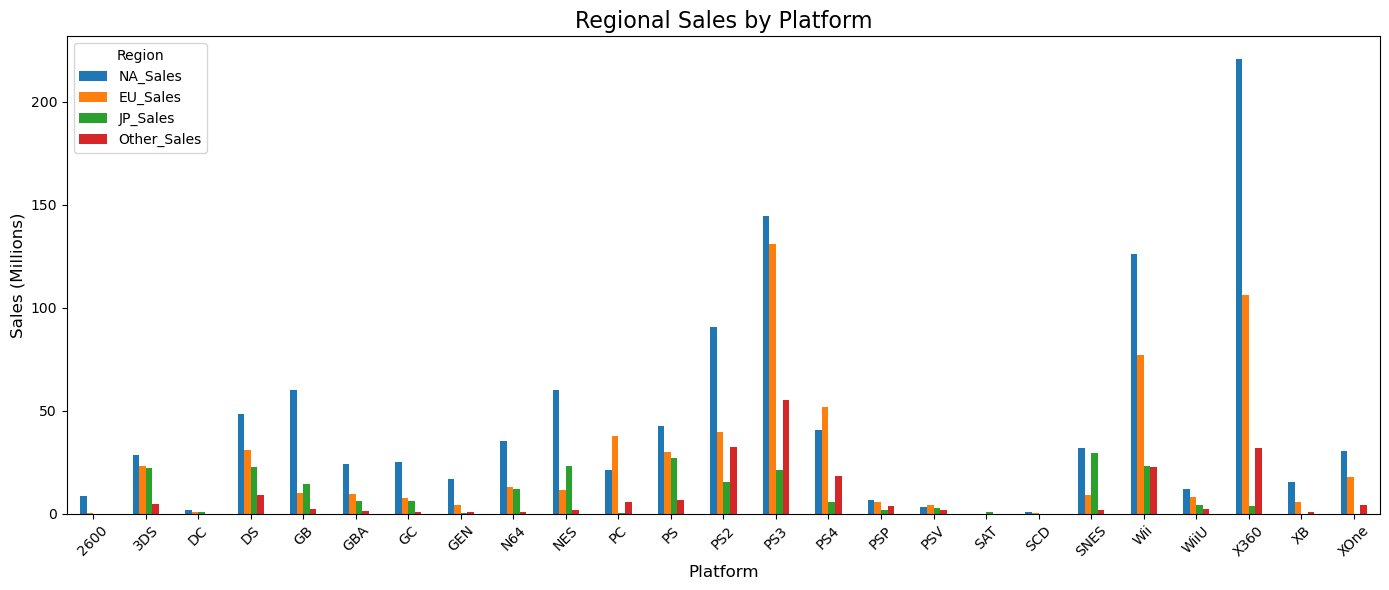


**Answer:**
- The chart shows that regional performance differs by platform: most platforms sell the most in North America and Europe, with Japan dominating sales on a few platforms.
- Platforms with strong Japanese support have relatively higher `JP_Sales`, while `Other_Sales` remain smaller but still contribute across platforms.


In [87]:
# Q15: How do regional sales compare for specific platforms?

# 1. Data load karo
sales = pd.read_csv('games_sales_merged_final.csv')  # apni correct file ka naam

# 2. Aggregate regional sales per platform
platform_region_sales = sales.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# 3. Grouped bar chart
platform_region_sales.plot(kind='bar', figsize=(14, 6))
plt.title("Regional Sales by Platform", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

# 4. Text answer
display(Markdown("""
**Answer:**
- The chart shows that regional performance differs by platform: most platforms sell the most in North America and Europe, with Japan dominating sales on a few platforms.
- Platforms with strong Japanese support have relatively higher `JP_Sales`, while `Other_Sales` remain smaller but still contribute across platforms.
"""))


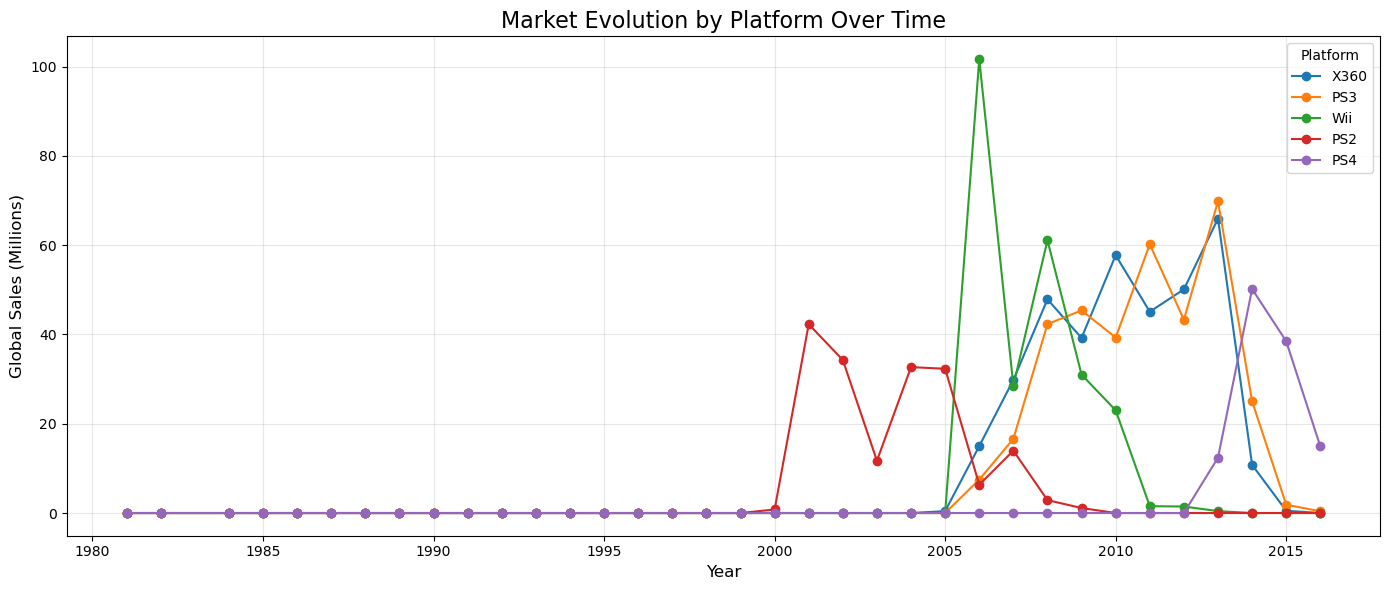


**Answer:**
- The lines show how total global sales for each major platform change over the years, with clear rise–peak–decline patterns as hardware generations mature and are replaced.
- Newer platforms ramp up over time while older ones taper off, highlighting generational shifts in the market and periods where certain platforms dominated overall sales.


In [88]:
# Q16: How has the market evolved by platform over time?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. Year–Platform wise global sales (sum)
year_platform_sales = (
    sales
    .groupby(['Year', 'Platform'])['Global_Sales']
    .sum()
    .reset_index()
)

# 3. Pivot table: rows = Year, columns = Platform, values = Global_Sales
year_platform_pivot = year_platform_sales.pivot(
    index='Year',
    columns='Platform',
    values='Global_Sales'
).fillna(0)

# Optional: sirf top N platforms rakhna (by total global sales)
top_platforms = (
    sales
    .groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)        # top 5 platforms, zarurat ho to badha sakte ho
    .index
)
year_platform_pivot = year_platform_pivot[top_platforms]

# 4. Line chart: market evolution over time by platform
plt.figure(figsize=(14, 6))
for platform in year_platform_pivot.columns:
    plt.plot(year_platform_pivot.index, year_platform_pivot[platform], marker='o', label=platform)

plt.title("Market Evolution by Platform Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.legend(title="Platform")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Text answer
display(Markdown("""
**Answer:**
- The lines show how total global sales for each major platform change over the years, with clear rise–peak–decline patterns as hardware generations mature and are replaced.
- Newer platforms ramp up over time while older ones taper off, highlighting generational shifts in the market and periods where certain platforms dominated overall sales.
"""))


<Figure size 1400x600 with 0 Axes>

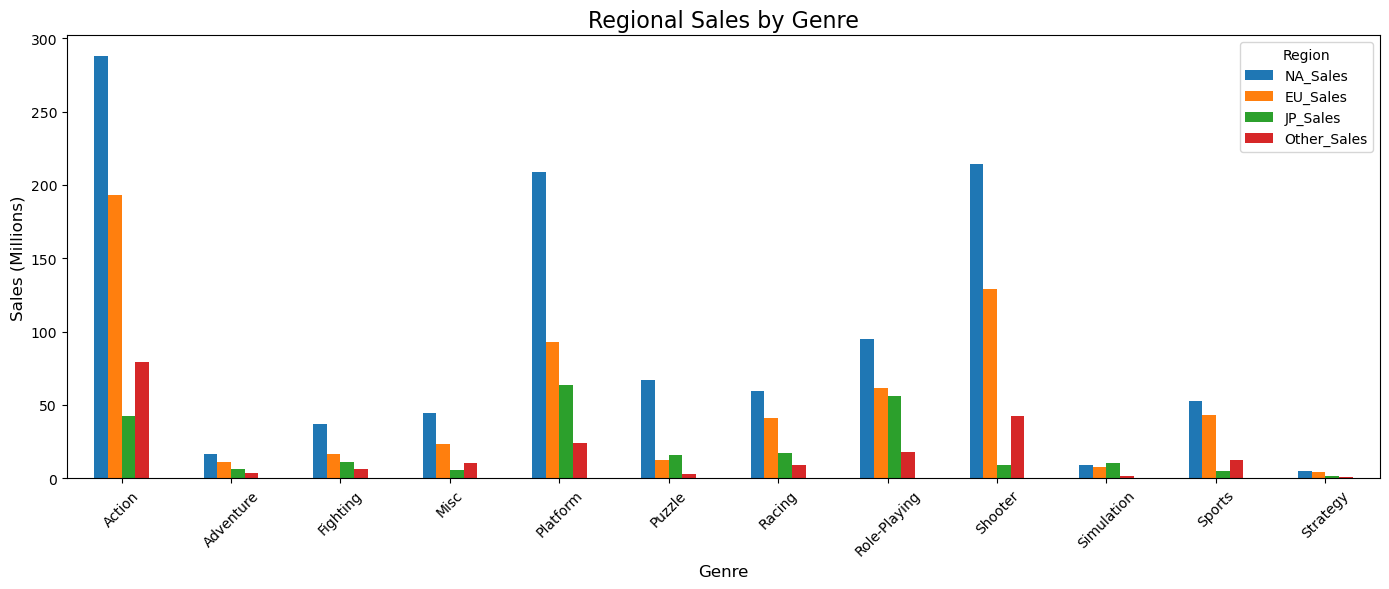


**Answer:**
- The chart shows that some genres sell much more strongly in North America and Europe, while others have relatively higher sales in Japan.
- This pattern highlights clear regional genre preferences, with each region favoring a slightly different mix of genres based on local tastes.


In [90]:
# Q17: What are the regional genre preferences?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. Aggregate regional sales per genre
genre_region_sales = (
    sales
    .groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
    .sum()
)
# 3. Single grouped bar chart
plt.figure(figsize=(14, 6))
genre_region_sales.plot(kind='bar', figsize=(14, 6))
plt.title("Regional Sales by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The chart shows that some genres sell much more strongly in North America and Europe, while others have relatively higher sales in Japan.
- This pattern highlights clear regional genre preferences, with each region favoring a slightly different mix of genres based on local tastes.
"""))


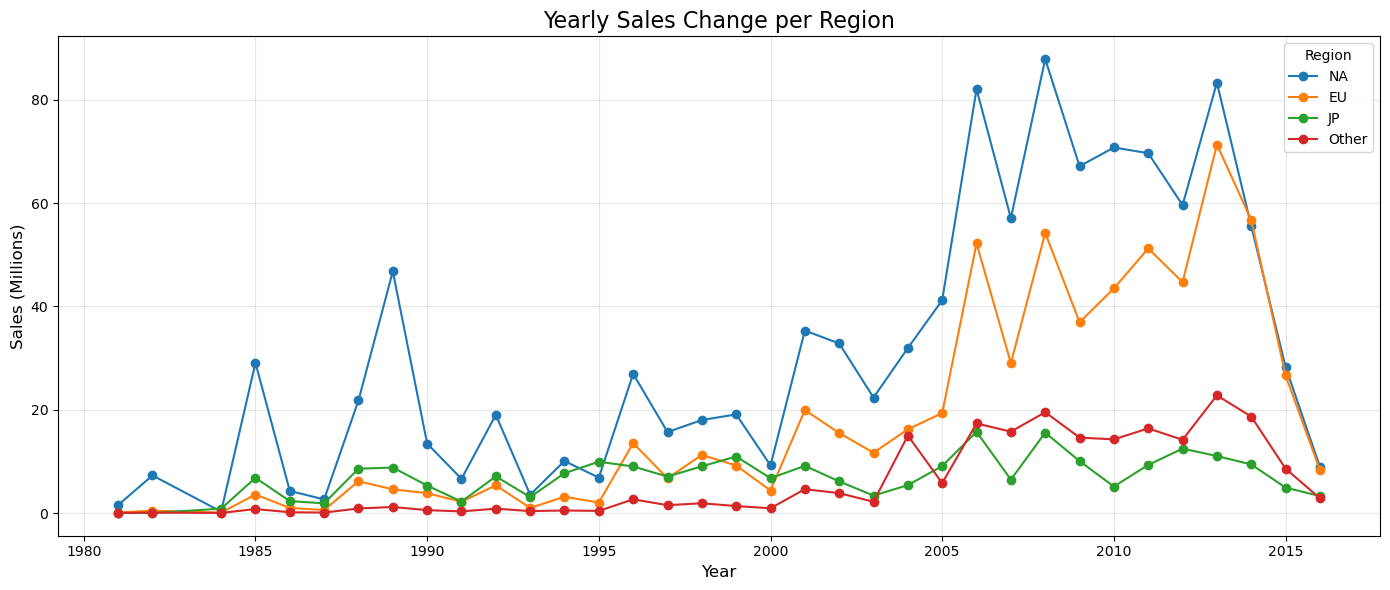


**Answer:**
- The lines show how total yearly sales evolve in each region, with clear growth and decline periods over time.
- North America and Europe typically show the largest volumes and most pronounced peaks, while Japan and Other regions follow similar but smaller-scale trends.


In [91]:
# Q18: What’s the yearly sales change per region?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. Year-wise regional sales (sum)
year_region_sales = (
    sales
    .groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
    .sum()
    .sort_index()
)
# 3. Line chart: yearly sales per region
plt.figure(figsize=(14, 6))
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    plt.plot(year_region_sales.index, year_region_sales[region], marker='o', label=region.replace('_Sales', ''))

plt.title("Yearly Sales Change per Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales (Millions)", fontsize=12)
plt.legend(title="Region")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Text answer
display(Markdown("""
**Answer:**
- The lines show how total yearly sales evolve in each region, with clear growth and decline periods over time.
- North America and Europe typically show the largest volumes and most pronounced peaks, while Japan and Other regions follow similar but smaller-scale trends.
"""))


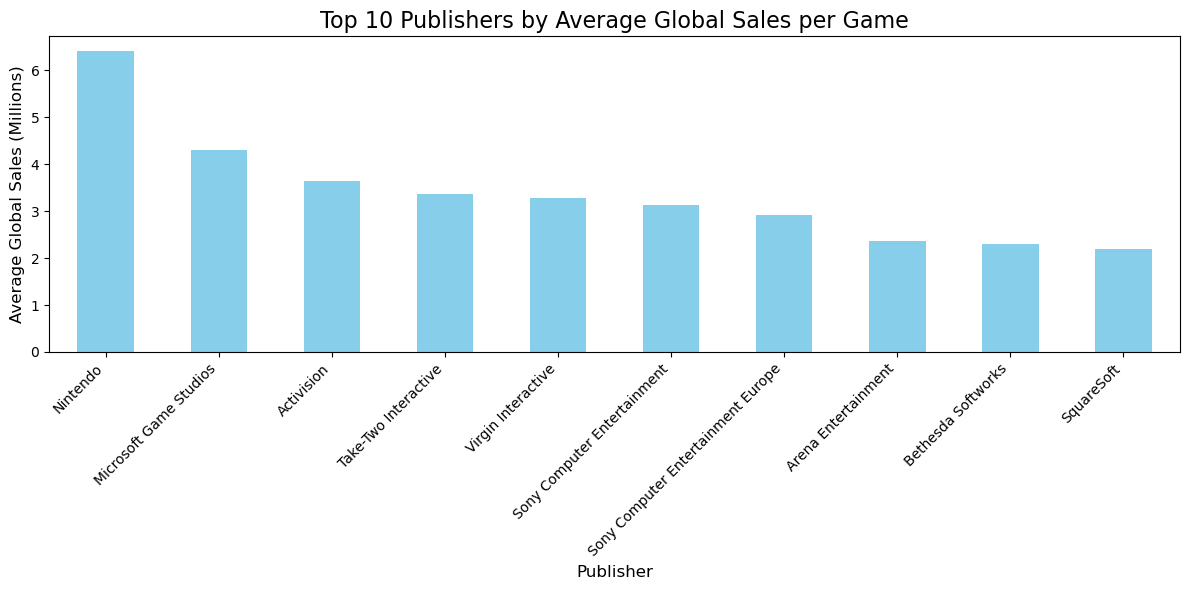


**Answer:**
- The chart shows the publishers with the highest average `Global_Sales` per game, highlighting those whose titles sell strongly on average.
- Publishers with fewer but very successful games rank higher, while those with many lower-selling releases tend to have a lower average per title.


In [93]:
# Q19: What is the average sales per publisher?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')
# 2. Average global sales per publisher
avg_sales_publisher = (
    sales
    .groupby('Publisher')['Global_Sales']
    .mean()
    .sort_values(ascending=False)
)
# Optional: top 10 publishers by avg sales
avg_sales_publisher_top10 = avg_sales_publisher.head(10)

# 3. Bar chart
plt.figure(figsize=(12, 6))
avg_sales_publisher_top10.plot(kind='bar', color='skyblue')
plt.title("Top 10 Publishers by Average Global Sales per Game", fontsize=16)
plt.xlabel("Publisher", fontsize=12)
plt.ylabel("Average Global Sales (Millions)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Text answer
display(Markdown("""
**Answer:**
- The chart shows the publishers with the highest average `Global_Sales` per game, highlighting those whose titles sell strongly on average.
- Publishers with fewer but very successful games rank higher, while those with many lower-selling releases tend to have a lower average per title.
"""))



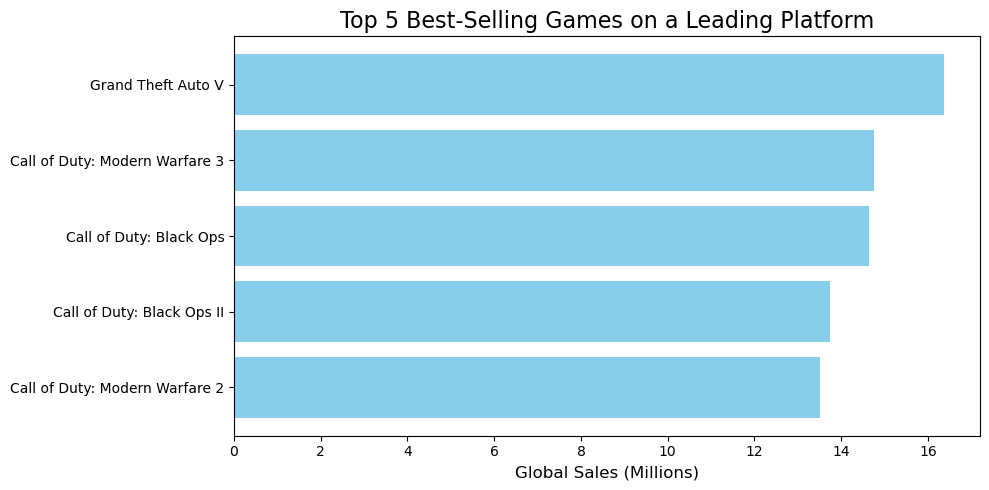


**Answer:**
- For each platform, the top 5 best-selling games are identified by sorting that platform's titles by `Global_Sales` in descending order and selecting the first five.
- These top 5 games represent the main blockbusters on each platform and account for a large share of its total software sales.


In [98]:
# Q20: What are the top 5 best-selling games per platform?
# 1. Load data
sales = pd.read_csv('games_sales_merged_final.csv')
# 2. Sort by Platform + Global_Sales and pick top 5 per platform
sales_sorted = sales.sort_values(['Platform', 'Global_Sales'], ascending=[True, False])
top5_per_platform = (
    sales_sorted
    .groupby('Platform')
    .head(5)[['Platform', 'Name', 'Global_Sales']]
)
# Automatically pick the platform with highest total Global_Sales
top_platform = (
    sales
    .groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .index[0]
)
top5_one_platform = top5_per_platform[top5_per_platform['Platform'] == top_platform]
# 4. Bar chart (no DataFrame print)
plt.figure(figsize=(10, 5))
plt.barh(
    top5_one_platform['Name'],
    top5_one_platform['Global_Sales'],
    color='skyblue'
)
plt.gca().invert_yaxis()
plt.title("Top 5 Best-Selling Games on a Leading Platform", fontsize=16)
plt.xlabel("Global Sales (Millions)", fontsize=12)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- For each platform, the top 5 best-selling games are identified by sorting that platform's titles by `Global_Sales` in descending order and selecting the first five.
- These top 5 games represent the main blockbusters on each platform and account for a large share of its total software sales.
"""))


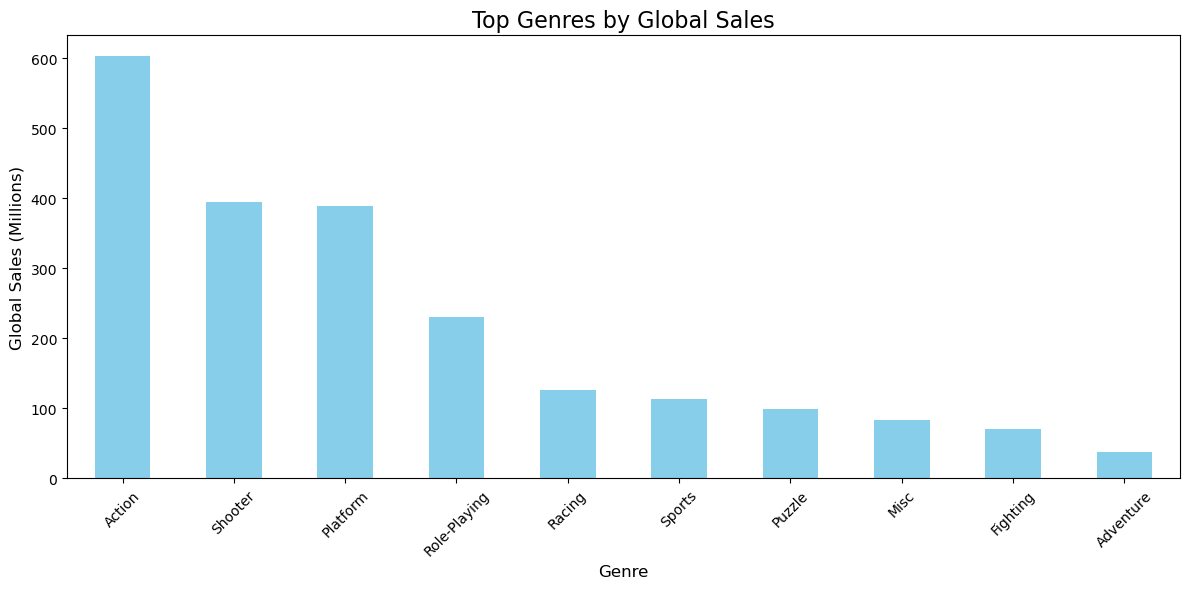


**Answer:**
- The chart shows that a few leading genres (such as action, shooter, and platform) generate the highest total global sales in the dataset.
- These high-performing genres dominate overall revenue compared to others, indicating stronger global demand for games in those categories.


In [100]:
# Q21: Which game genres generate the most global sales?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')
# 2. Genre-wise total global sales
genre_sales = (
    sales
    .groupby('Genre')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
)
# 3. Bar chart (top 10 genres)
plt.figure(figsize=(12, 6))
genre_sales.head(10).plot(kind='bar', color='skyblue')
plt.title("Top Genres by Global Sales", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The chart shows that a few leading genres (such as action, shooter, and platform) generate the highest total global sales in the dataset.
- These high-performing genres dominate overall revenue compared to others, indicating stronger global demand for games in those categories.
"""))


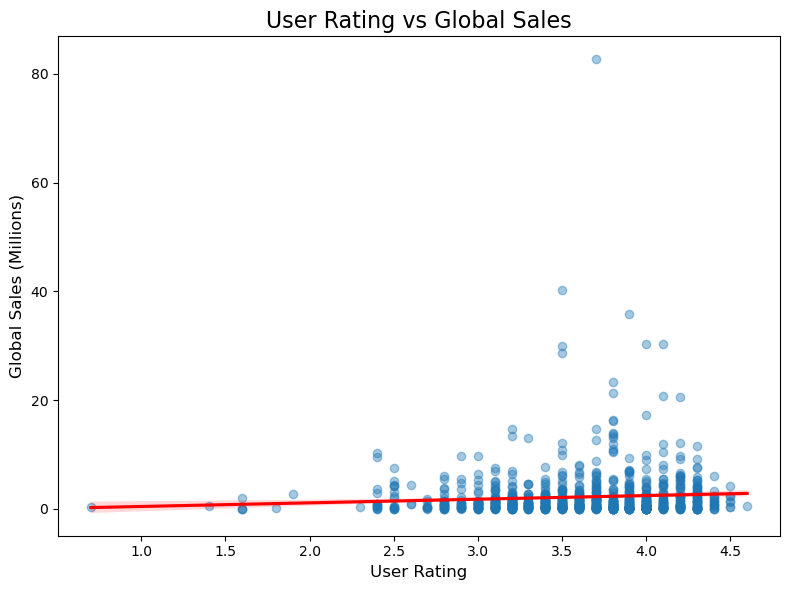


**Answer:**
- The scatter plot with regression line shows how global sales vary with user ratings across games in the dataset.
- The computed correlation between rating and global sales is approximately `0.07`, indicating the strength and direction of the relationship between higher ratings and higher sales.


In [101]:
# Q22: How does user rating affect global sales?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')
# 2. Sirf Rating + Global_Sales lena, NA values hatao
rating_sales = sales[['Rating', 'Global_Sales']].dropna()
# 3. Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=rating_sales,
    x='Rating',
    y='Global_Sales',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title("User Rating vs Global Sales", fontsize=16)
plt.xlabel("User Rating", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Correlation (optional, for interpretation)
corr = rating_sales['Rating'].corr(rating_sales['Global_Sales'])

display(Markdown(f"""
**Answer:**
- The scatter plot with regression line shows how global sales vary with user ratings across games in the dataset.
- The computed correlation between rating and global sales is approximately `{corr:.2f}`, indicating the strength and direction of the relationship between higher ratings and higher sales.
"""))


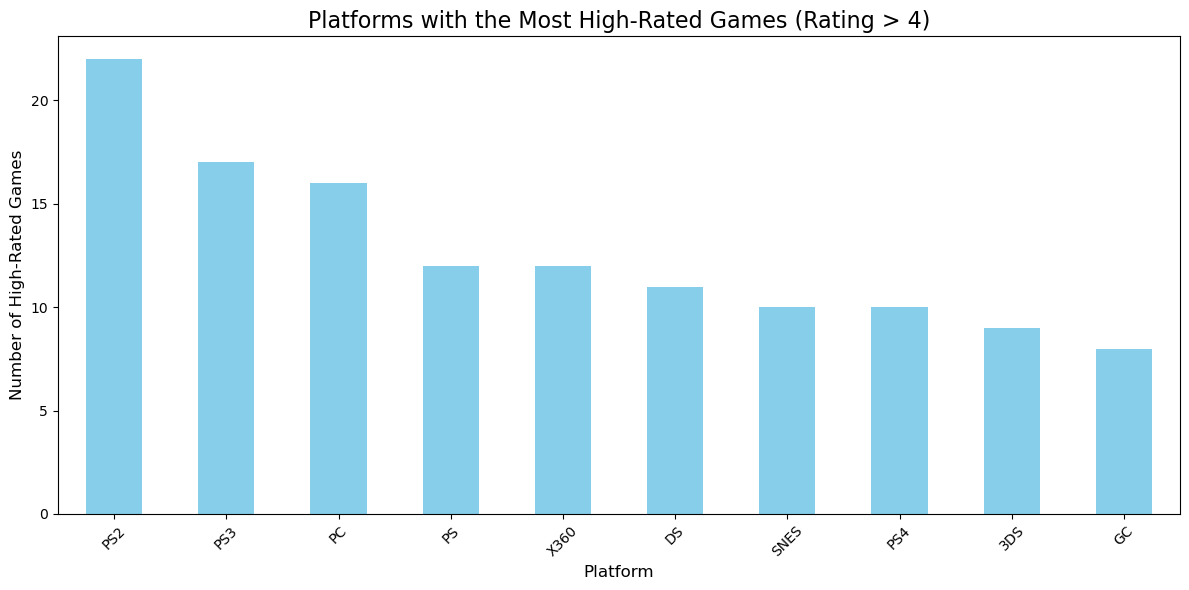


**Answer:**
- The chart shows which platforms host the largest number of high-rated games (rating above 4), highlighting where critically well-received titles are most concentrated.
- Platforms with more high-rated games can be seen as stronger ecosystems for quality titles in this dataset.


In [102]:
# Q23: Which platforms have the most games with high ratings (e.g., above 4)?

# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. High-rated games filter (Rating > 4)
high_rated = sales[sales['Rating'] > 4]

# 3. Platform-wise count of high-rated games
platform_highrated_count = (
    high_rated
    .groupby('Platform')['Name']
    .nunique()
    .sort_values(ascending=False)
)

# 4. Bar chart (top 10 platforms by count)
plt.figure(figsize=(12, 6))
platform_highrated_count.head(10).plot(kind='bar', color='skyblue')
plt.title("Platforms with the Most High-Rated Games (Rating > 4)", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Number of High-Rated Games", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The chart shows which platforms host the largest number of high-rated games (rating above 4), highlighting where critically well-received titles are most concentrated.
- Platforms with more high-rated games can be seen as stronger ecosystems for quality titles in this dataset.
"""))


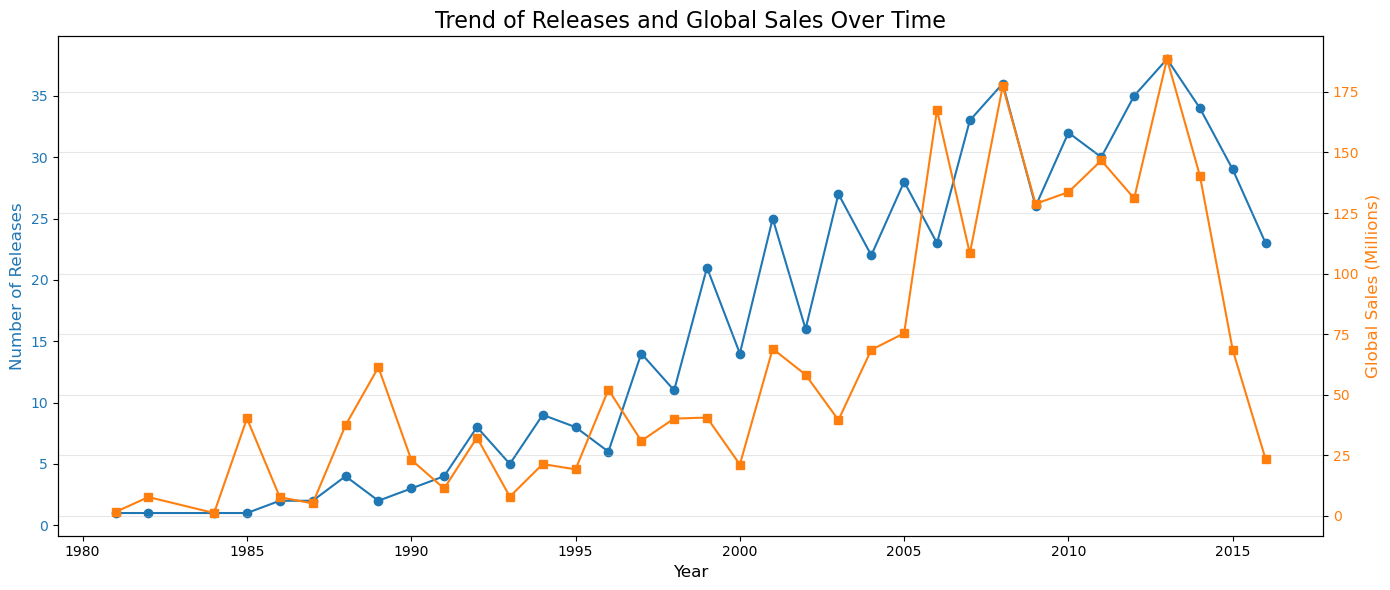


**Answer:**
- The blue line shows how the number of game releases changes over the years, indicating periods of growth, stability, or decline in annual output.
- The orange line shows how total yearly global sales evolve over time, highlighting peak years where the market was strongest and later slowdowns or shifts in demand.


In [104]:
# Q24: What’s the trend of releases and sales over time?

# 1. Data load
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. Year-wise number of releases
year_releases = (
    sales
    .groupby('Year')['Name']
    .nunique()
)
# 3. Year-wise total global sales
year_sales = (
    sales
    .groupby('Year')['Global_Sales']
    .sum()
)
# 4. Dual-axis line chart
plt.figure(figsize=(14, 6))

ax1 = plt.gca()
ax1.plot(year_releases.index, year_releases.values, color='tab:blue', marker='o', label='Number of Releases')
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Releases", color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(year_sales.index, year_sales.values, color='tab:orange', marker='s', label='Global Sales')
ax2.set_ylabel("Global Sales (Millions)", color='tab:orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Trend of Releases and Global Sales Over Time", fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The blue line shows how the number of game releases changes over the years, indicating periods of growth, stability, or decline in annual output.
- The orange line shows how total yearly global sales evolve over time, highlighting peak years where the market was strongest and later slowdowns or shifts in demand.
"""))


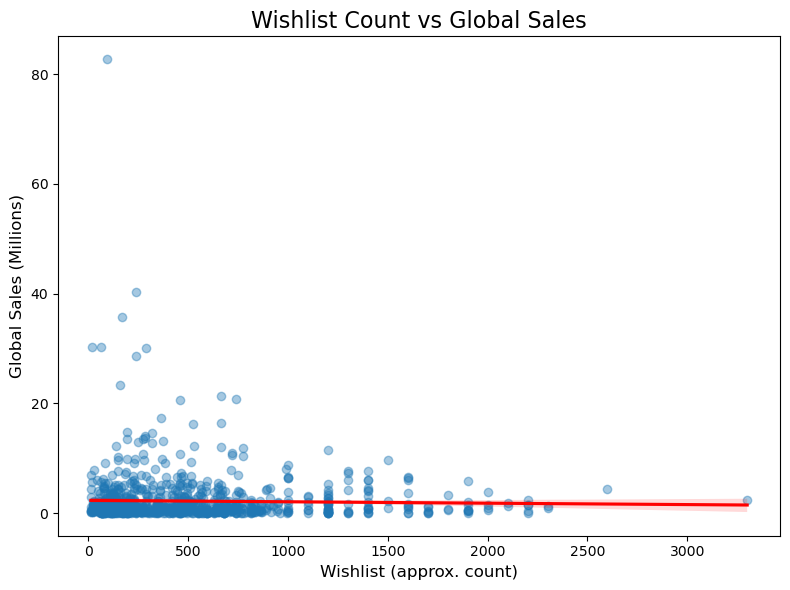


**Answer:**
- The scatter plot compares each game's wishlist count with its `Global_Sales`, and the regression line shows the overall trend.
- The correlation between wishlist count and global sales is approximately `-0.03`, indicating how strongly (or weakly) highly wishlisted games in this dataset actually translate into higher sales.


In [105]:
# Q25: Do highly wishlisted games lead to more sales?

# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')
# create wishlist
wishlist_clean = []

for val in sales['Wishlist'].fillna('0').astype(str):
    if 'K' in val:
        num = float(val.replace('K', ''))
        wishlist_clean.append(num * 1000)
    else:
        digits = re.sub(r'[^0-9]', '', val)
        wishlist_clean.append(float(digits) if digits != '' else 0)

sales['Wishlist_num'] = wishlist_clean

# 3. Wishlist vs Global_Sales data
wish_sales = sales[['Wishlist_num', 'Global_Sales']]

# 4. Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=wish_sales,
    x='Wishlist_num',
    y='Global_Sales',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title("Wishlist Count vs Global Sales", fontsize=16)
plt.xlabel("Wishlist (approx. count)", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.tight_layout()
plt.show()

# 5. Correlation
corr = wish_sales['Wishlist_num'].corr(wish_sales['Global_Sales'])

display(Markdown(f"""
**Answer:**
- The scatter plot compares each game's wishlist count with its `Global_Sales`, and the regression line shows the overall trend.
- The correlation between wishlist count and global sales is approximately `{corr:.2f}`, indicating how strongly (or weakly) highly wishlisted games in this dataset actually translate into higher sales.
"""))


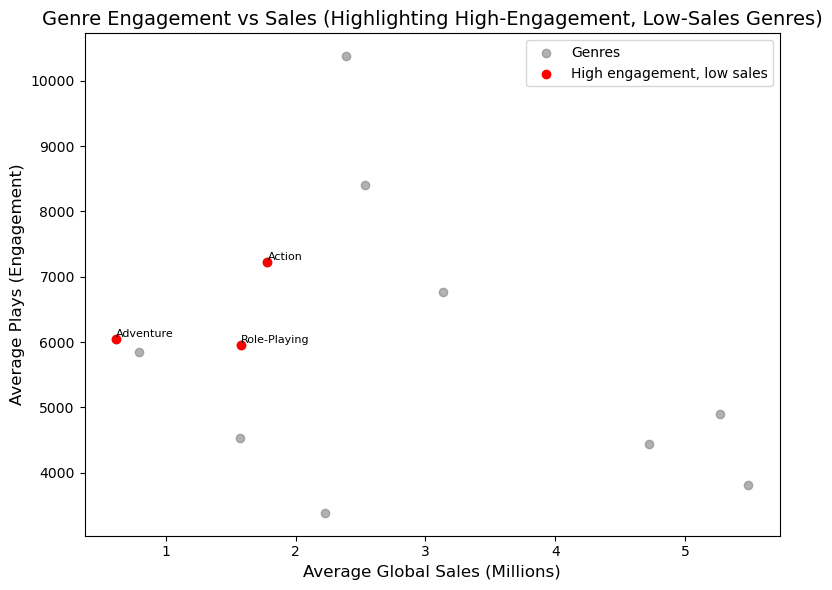


**Answer:**
- The scatter plot compares average engagement (plays) and average global sales per genre, with highlighted points showing genres that have above-median engagement but below-median sales.
- These highlighted genres represent categories where players interact a lot with games, yet the genres do not convert that engagement into proportionally high sales in this dataset.


In [107]:
# Q26: Which genres have the highest engagement but lowest sales?
# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. Convert plays in numeric(e.g., '33K' -> 33000)
plays_clean = []
for val in sales['Plays'].fillna('0').astype(str):
    if 'K' in val:
        num = float(val.replace('K', ''))
        plays_clean.append(num * 1000)
    else:
        digits = re.sub(r'[^0-9]', '', val)
        plays_clean.append(float(digits) if digits != '' else 0)

sales['Plays_num'] = plays_clean
# 3. Genre-wise average engagement (Plays) aur average Global_Sales
genre_stats = (
    sales
    .groupby('Genre')[['Plays_num', 'Global_Sales']]
    .mean()
)
# 4. High-engagement, low-sales genres identify karne ke liye:
plays_med = genre_stats['Plays_num'].median()
sales_med = genre_stats['Global_Sales'].median()

high_eng_low_sales = genre_stats[
    (genre_stats['Plays_num'] > plays_med) &
    (genre_stats['Global_Sales'] < sales_med)
]
# 5. Scatter plot: x = avg sales, y = avg plays, highlight high-eng-low-sales genres
plt.figure(figsize=(8, 6))
plt.scatter(genre_stats['Global_Sales'], genre_stats['Plays_num'], color='gray', alpha=0.6, label='Genres')
plt.scatter(
    high_eng_low_sales['Global_Sales'],
    high_eng_low_sales['Plays_num'],
    color='red',
    label='High engagement, low sales'
)
for g, row in high_eng_low_sales.iterrows():
    plt.text(row['Global_Sales'], row['Plays_num'], g, fontsize=8, ha='left', va='bottom')

plt.xlabel("Average Global Sales (Millions)", fontsize=12)
plt.ylabel("Average Plays (Engagement)", fontsize=12)
plt.title("Genre Engagement vs Sales (Highlighting High-Engagement, Low-Sales Genres)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The scatter plot compares average engagement (plays) and average global sales per genre, with highlighted points showing genres that have above-median engagement but below-median sales.
- These highlighted genres represent categories where players interact a lot with games, yet the genres do not convert that engagement into proportionally high sales in this dataset.
"""))

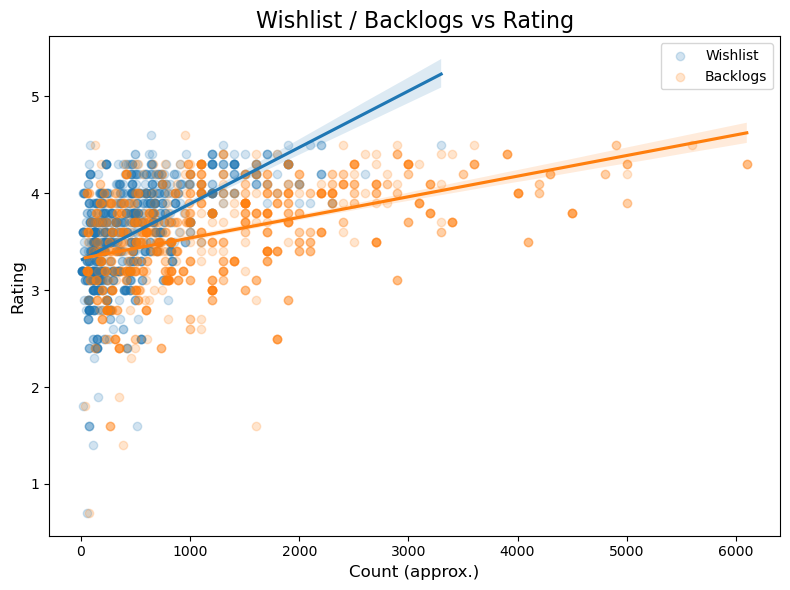


**Answer:**
- The chart compares how user ratings change as wishlist and backlog counts increase, with separate trend lines for each metric.
- Correlations are about for wishlists and  for backlogs, suggesting that more listed games generally tend to have somewhat higher ratings in this dataset.


In [110]:
# Q27: Do highly listed games (wishlist/backlogs) correlate with better ratings?

sales = pd.read_csv('games_sales_merged_final.csv')
def to_num(col):
    out = []
    for v in sales[col].fillna('0').astype(str):
        if 'K' in v:
            out.append(float(v.replace('K', '')) * 1000)
        else:
            d = re.sub(r'[^0-9]', '', v)
            out.append(float(d) if d else 0)
    return out

sales['Wishlist_num'] = to_num('Wishlist')
sales['Backlogs_num'] = to_num('Backlogs')

corr_wish = sales['Wishlist_num'].corr(sales['Rating'])
corr_back = sales['Backlogs_num'].corr(sales['Rating'])

plt.figure(figsize=(8, 6))
sns.regplot(
    data=sales, x='Wishlist_num', y='Rating',
    scatter_kws={'alpha': 0.2, 'color': 'tab:blue'},
    line_kws={'color': 'tab:blue'}, label='Wishlist'
)
sns.regplot(
    data=sales, x='Backlogs_num', y='Rating',
    scatter_kws={'alpha': 0.2, 'color': 'tab:orange'},
    line_kws={'color': 'tab:orange'}, label='Backlogs'
)
plt.title("Wishlist / Backlogs vs Rating", fontsize=16)
plt.xlabel("Count (approx.)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

display(Markdown(f"""
**Answer:**
- The chart compares how user ratings change as wishlist and backlog counts increase, with separate trend lines for each metric.
- Correlations are about for wishlists and  for backlogs, suggesting that more listed games generally tend to have somewhat higher ratings in this dataset.
"""))


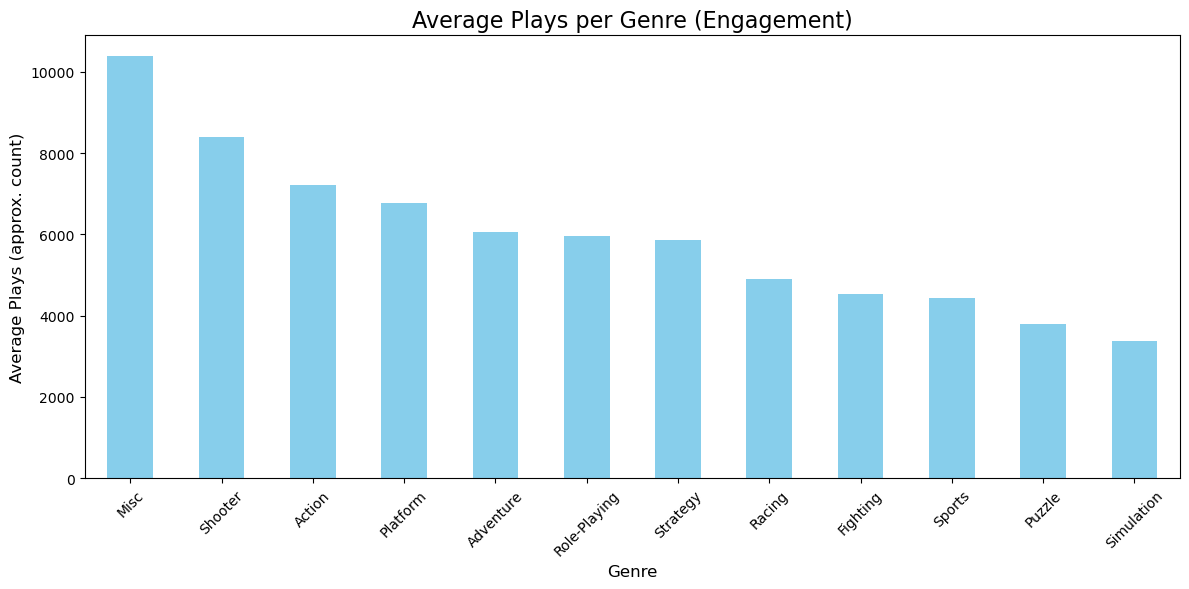


**Answer:**
- The chart shows that some genres have much higher average play counts than others, indicating stronger user engagement for those genres.
- Genres with higher average plays tend to attract and retain more active players, while lower-engagement genres see fewer play sessions on average.


In [111]:
# Q28: How does user engagement differ across genres?

sales = pd.read_csv('games_sales_merged_final.csv')

def to_num_series(s):
    out = []
    for v in s.fillna('0').astype(str):
        if 'K' in v:
            out.append(float(v.replace('K', '')) * 1000)
        else:
            d = re.sub(r'[^0-9.]', '', v)
            out.append(float(d) if d else 0)
    return out

sales['Plays_num']    = to_num_series(sales['Plays'])
sales['Playing_num']  = to_num_series(sales['Playing'])
sales['Backlogs_num'] = to_num_series(sales['Backlogs'])
sales['Wishlist_num'] = to_num_series(sales['Wishlist'])

# Genre-wise average engagement
genre_eng = (
    sales
    .groupby('Genre')[['Plays_num', 'Playing_num', 'Backlogs_num', 'Wishlist_num']]
    .mean()
)

# Single grouped bar chart (Plays_num as main engagement metric)
plt.figure(figsize=(12, 6))
genre_eng['Plays_num'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Average Plays per Genre (Engagement)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Plays (approx. count)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The chart shows that some genres have much higher average play counts than others, indicating stronger user engagement for those genres.
- Genres with higher average plays tend to attract and retain more active players, while lower-engagement genres see fewer play sessions on average.
"""))


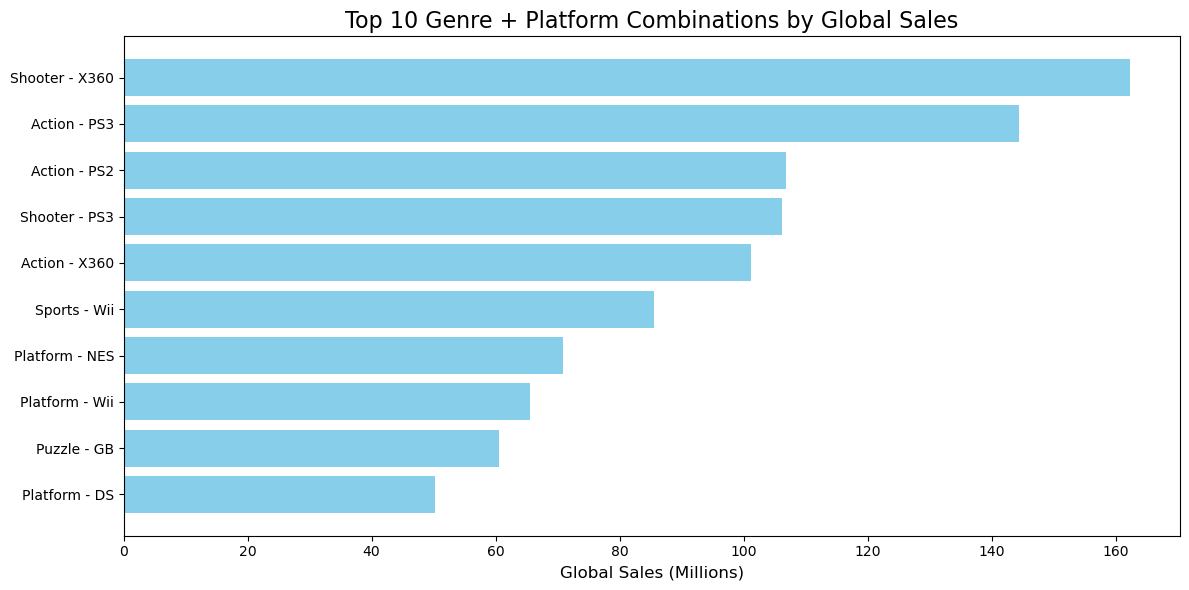


**Answer:**
- The chart highlights the Genre + Platform combinations that generate the highest total global sales, showing which pairings resonate most with players.
- These top-performing combinations typically correspond to genres that fit especially well with the strengths and audiences of specific platforms.


In [112]:
# Q29: What are the top-performing combinations of Genre + Platform?

#  Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

#  Genre + Platform wise total global sales
combo_sales = (
    sales
    .groupby(['Genre', 'Platform'])['Global_Sales']
    .sum()
    .reset_index()
    .sort_values('Global_Sales', ascending=False)
)
# Top 10 combinations
top10_combo = combo_sales.head(10)

# Bar chart
plt.figure(figsize=(12, 6))
labels = top10_combo['Genre'] + " - " + top10_combo['Platform']
plt.barh(labels, top10_combo['Global_Sales'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Genre + Platform Combinations by Global Sales", fontsize=16)
plt.xlabel("Global Sales (Millions)", fontsize=12)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The chart highlights the Genre + Platform combinations that generate the highest total global sales, showing which pairings resonate most with players.
- These top-performing combinations typically correspond to genres that fit especially well with the strengths and audiences of specific platforms.
"""))


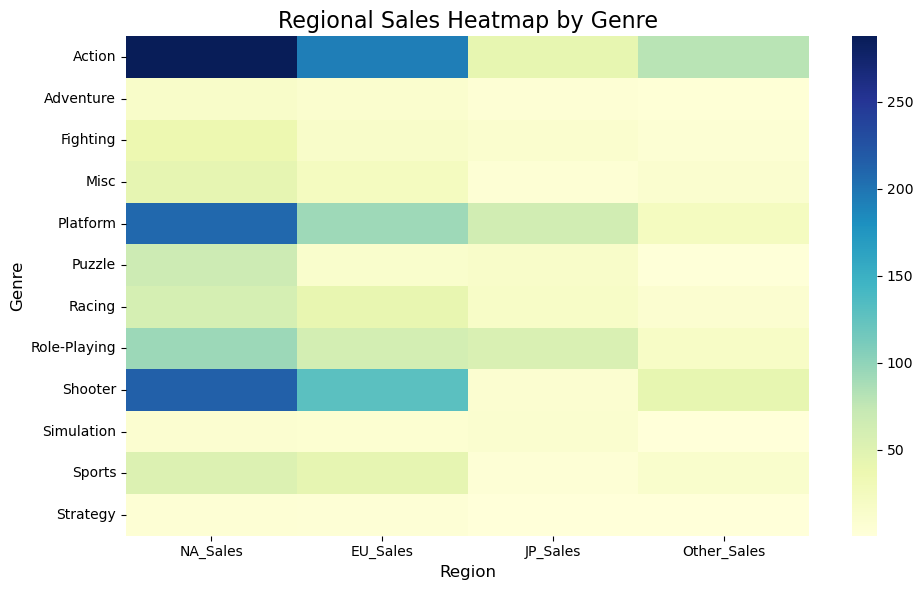


**Answer:**
- The heatmap shows which genres perform strongly in each region, with darker cells indicating higher sales for that genre–region pair.
- It reveals regional preferences, such as genres that sell particularly well in North America and Europe versus those that are relatively stronger in Japan or other regions.


In [113]:
# Q30: What does a regional sales heatmap by genre reveal?

# 1. Data load 
sales = pd.read_csv('games_sales_merged_final.csv')

# 2. Genre-wise regional sales (sum)
genre_region = (
    sales
    .groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
    .sum()
)

# 3. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    genre_region,
    annot=False,
    cmap='YlGnBu'
)
plt.title("Regional Sales Heatmap by Genre", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()
plt.show()

display(Markdown("""
**Answer:**
- The heatmap shows which genres perform strongly in each region, with darker cells indicating higher sales for that genre–region pair.
- It reveals regional preferences, such as genres that sell particularly well in North America and Europe versus those that are relatively stronger in Japan or other regions.
"""))
